<a href="https://colab.research.google.com/github/Madhushree2000/Image-segmentation/blob/main/Watershed_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Watershed Algorithm

A watershed algorithm handles any grayscale image as a topographic surface where high intensity denotes peaks and hills while low intensity denotes valleys. It considers the brightness of a pixel as its height and finds the lines that run along the top of those ridges. 

We label the region which we are sure of being the foreground or object with one color (or intensity), label the region which we are sure of being background or non-object with another color and finally the region which we are not sure of anything, label it with 0. That is our marker. Then apply watershed algorithm. Then our marker will be updated with the labels we gave, and the boundaries of objects will have a value of -1.



In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow



In [146]:
def watershed(img):
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  
  # noise removal
  kernel = np.ones((2,2),np.uint8)
  #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 3)
  closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

  # sure background area
  sure_bg = cv2.dilate(closing,kernel,iterations=5)

  # Finding sure foreground area
  dist_transform = cv2.distanceTransform(closing,cv2.DIST_L2,3)
  ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

  # Finding unknown region
  sure_fg = np.uint8(sure_fg)
  unknown = cv2.subtract(sure_bg,sure_fg)

  # Marker labelling
  ret, markers = cv2.connectedComponents(unknown)
  markers += 1

  # Now, mark the region of unknown with zero
  markers[unknown==255] = 0

  markers = cv2.watershed(img,markers)
  img[markers == -1] = [255,0,0]

  plt.subplot(211)
  plt.imshow(thresh, 'gray')
  plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
  plt.subplot(212),plt.imshow(img, 'gray')
  plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])
  plt.tight_layout()
  plt.show()

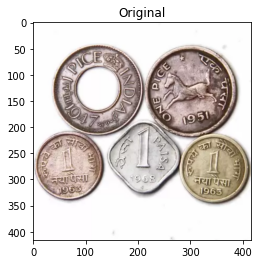

In [145]:
img = cv2.imread("/content/coins-lot-collection-traditionalshoppe-original-imafw3hhvaqdbdvz.jpeg.webp")
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

plt.imshow(rgb_img)
plt.title("Original")
plt.show()

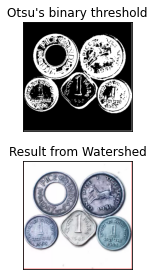

In [147]:
watershed(img)

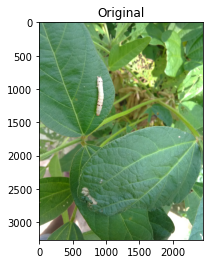

In [149]:
img1 = cv2.imread("/content/00083IMG_00083_BURST20191001102824.jpg")
b,g,r = cv2.split(img1)
rgb_img1 = cv2.merge([r,g,b])

plt.imshow(rgb_img1)
plt.title("Original")
plt.show()

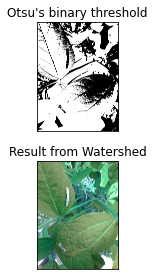

In [150]:
watershed(img1)

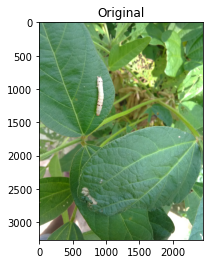

In [151]:
img2 = cv2.imread("/content/00011IMG_00011_BURST20190913114800.jpg")
b,g,r = cv2.split(img2)
rgb_img2 = cv2.merge([r,g,b])

plt.imshow(rgb_img1)
plt.title("Original")
plt.show()

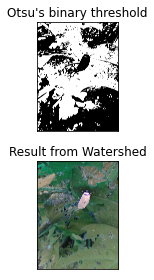

In [152]:
watershed(img2)